## 第二章 面向对象编程

一些原则：

1. 类应该以首字母大写的单数形式的名词来命名，如果是多个单词，使用`驼峰命名法`。
2. 函数包括类的方法，命名应该小写，一般用描述作用的动词来命名，如果返回的值直接可用名词描述，那就用名词命名。多个单词用`下划线命名法`。
3. 对变量命名包括实例变量，一般为小写的名词。
4. 常量命名一般是大写单词，并用`下划线命名法`。

以单下划线开头的标识符，一般意味着只为类或者模块内部使用，不作为公共接口。

块注释：三个单引号或者三个双引号，且需要放在模块、类、函数主体第一个语句才能被识别为注释（docstring），否则为多行字符串并报错。事实上，help文档就是调出了函数的docstring。

面向对象编程设计：将工作分为不同角色（这些角色将成为不同的类），不同角色有不同的responsibility（这些责任决定了类的方法），然后就是不同对象协同工作（不同类之间如何合作）。

CreditCard类（信用卡类）：每张银行卡都是一个实例，不同银行卡一般有不同的实例变量。

In [41]:
class CreditCard:
    
    def __init__(self, customer, bank, acnt, limit):    ## 每个实例存储的实例变量，反映其当前状态，这个函数称为类的构造函数
        self._customer = customer                       ## 初始化，实例变量传入
        self._bank = bank
        self._account = acnt                            ## 标识符不一样，一个为形式参数，一个是之后调用的
        self._limit = limit
        self._balance = 0                               ## 初始化不一定与传入参数完全一致，可以做一定处理，只要之后很多方法需要，那就先定义
        
    def get_customer(self):                             ## 这个self理解为调用我们之前初始化的实例变量，当然也可以多定义一些其他的参数
        return self._customer
    
    def get_bank(self):
        return self._bank
    
    def get_account(self):
        return self._account
    
    def get_limit(self):
        return self._limit 
    
    def get_balance(self):
        return self._balance
    
    def charge(self, price):                             ## 这个price是在调用实例（如信用卡充值了，应该增加余额）时输入的外界变量
        if price + self._balance > self._limit:          ## 充值加余额不能查过信用额度
            return False
        else:
            self._balance += price                       ## 这里改变了实例变量，也是之所以前面被称为初始化的原因
            return True
        
    def make_payment(self, amount):
        self._balance -= amount    

在调用实例方法时，并不需要输入self，因为Python解释器会自动将前面的实例名称绑定为self，所以说self在类的定义中充当实例的标识符。下面来创建一个实例：

In [45]:
cc = CreditCard('John Doe', '1st Bank', '5391 0375 9387 5309', 1000)

`__init__`方法称为类的构造函数，作用"承上启下"，既规定实例变量，也规定了类的实例对实例变量如何调用，是从外到内，也是后续定义其他方法的基础。`self._balance`中的下划线表示这个实例变量是不可直接访问的（非公有的 nonpublic），也不可直接更改的，只能通过类定义的方法进行更改，想获取这个实例的变量的值，也只能通过方法来return，否则，每一张信用卡都可以随意更改为无限大的余额，这显然是不行的，通过充值和消费（信用卡类的两个方法）来更改余额才是合理的。（然而事实上，这个下划线只是表明这个意思，却没有实际限制`cc._balance`来访问或者`cc._balance = 1`来赋值等语句的执行）

类的实例间的运算符如`+`、`-`、`*`等可以通过特别方法赋予特殊的含义（比如内置类list，`+`就通过特殊方法定义为连接）。例如可以通过在类中定义`__add__()`方法来定义类的实例之间的加减，比如`a+b`相当于`a.__add__(b)`或者`b.__radd__(a)`，即可以是左边的类定义了`__add__()`方法（先看左边），也可以是右边的类定义了`__radd__()`方法。类似的特殊方法还有很多。通过类的特殊方法可以定义类的实例之间的运算。（运算符左右交换可能产生不同的结果）

顶层函数或者一些类如`str()`、`len()`等，在运行`str(foo)`，`len(foo)`时（foo是类的实例），其实是调用了foo这个实例对应的类的方法`foo.__str__()`和`foo.__len__()`，相当于类本身给定这些特殊的顶层函数或者常用的类对应的方法，当上面形式的代码运行时，直接调用类定义的方法。

下面给出一个Vector类，实现一些特殊的方法（如定义与列表不同的__add__()方法，最终定义的其实类似于R语言的向量）：

In [20]:
class Vector:
    
    def __init__(self, d):                 ## d是一个正整数
        self._coords = [0]*d               ## 最终是调用了list类的一个实例，这里初始化就不是d，而是d维列表
    
    def __len__(self):
        return len(self._coords)           ## 仍然使用list长度的概念，注意self._coords是list，但self不是list，而是实例
    
    def __getitem__(self, j):              ## 访问第j个元素，用__getitem__方法定义，一些不符合规范的，但符合理解往往都有特殊方法
        return self._coords[j]
    
    def __setitem__(self, j, val):         ## 修改第j个元素的值
        self._coords[j] = val              ## 在这里不要考虑变量的作用域什么的，很乱

    def __add__(self, other):              ## 定义实例之间的和运算
        if len(self) != len(other):
            raise ValueError('dimensions must agree')       ## ValueError是一个异常类，其中应该是定义了raise的特殊方法
        result = Vector(len(self))
        for j in range(len(self)):
            result[j] = self[j] + other[j]
        return result
    
    def __eq__(self, other):                ## 相等的定义套用list的定义
        return self._coords == other._coords 
    
    def __ne__(self, other):
        return not self == other
    
    def __str__(self):                      ## print(..)或者str(..)时会调用，只要print就一定是先转化为字符
        return '<' + str(self._coords)[1:-1] + '>'

In [21]:
v = Vector(5)
v[1] = 23
v[-1] = 45
print(v[4])
u = v + v
print(u)
total = 0
for i in v:          ## 只要有__getitem__和__len__就可以迭代
    total += i

45
<0, 46, 0, 0, 90>


[点击跳转到迭代器和生成器](https://www.cnblogs.com/lvcm/p/9372622.html)

list、tuple、dict、set等容器之所以是`iterable`的，是因为在使用`for ... in ...`时，会自动调用这些类里面的`__iter__`方法，将可迭代对象转化为迭代器，而迭代器的协议就是拥有`__next__`方法，可以访问下一个元素，而`for ... in ...`第二次发挥了作用，会自动不断地调用`__next__`方法直至`raise StopIteration`，因此完成了迭代。正常来讲，要生成一个迭代器，需要定义`__iter__`方法，而生成器是一种生成迭代器的捷径，生成器可以直接生成迭代器。有两种方法可以构造生成器，一种是将列表解析（也叫列表生成式）的`[]`换成`()`，好处是如果生成的列表只起迭代作用，那么用生成器生成的迭代器来迭代可以节省内存。另一种方法是将函数的`return`换成`yield`，不过要注意，一般需要有多个`yield`或者写个`for`、`while`来多次`yield`。

生成器的执行步骤：每次调用`next()`的时候开始执行，到`yield`返回，下次调用`next()`的时候从上次`yield`之后继续执行，直到下一个`yield`。

可迭代对象（iterable）必须实现`__iter__()`方法。

迭代器（iterator）必须实现`__iter__()`和`__next__()`方法。

list占用内存而生成器或者迭代器不会：因为list是一次性存储所有数，而生成器和迭代器是每次`next()`才计算下一个，不需要存储所有的。

自定义Range类，要求支持`__len__()`和`__getitem__()`方法，从而可以直接用`len()`和`[k]`：

In [34]:
class Range:
    
    def __init__(self, start, stop=None, step=1):
        if step == 0:
            raise ValueError('step cannot be 0')
        if stop is None:
            start, stop = 0, start
        self._length = max(0, (stop - start + step - 1)//step)         ## 通过实例变量计算长度
        self._start = start
        self._stop = stop
        self._step = step
    
    def __len__(self):
        return self._length
    
    def __getitem__(self, k):
        if k < 0:
            k += len(self)
        if not 0 <= k < self._length:
            raise IndexError('index out of range')
        return self._start + k*self._step                              ## 仍然是通过实例变量计算

In [35]:
a = Range(1, 100, 2)
print(len(a))
print(a[12])

50
25


继承：子类（subclass、child class）可以继承父类（parent class、也称为基类 base class、超类 superclass）的实例变量（在初始化时需要一行代码加载）和方法，还可以定义自己的方法或者定义与父类相同名称的方法（会覆盖父类的该方法），父类的初始化往往是子类初始化的一部分。

In [78]:
class PredatoryCreditCard(CreditCard):
    
    def __init__(self, customer, bank, acnt, limit, apr):
        super().__init__(customer, bank, acnt, limit)              ## 引用父类的初始化
        self._apr = apr
    
    def charge(self, price):                                       ## 覆盖父类的方法
        success = super().charge(price)
        if not success:
            self._balance -= 5
        return success
    
    def process_month(self):
        if self._balance > 0:
            monthly._factor = pow(1 + self._apr, 1/12)
            self._balance *= monthly._factor

下面先实现一个数列（progression）类，然后分别实现等差数列、等比数列和斐波那契数列三个子列。

Progression类是一个迭代器（定义了两个特殊方法：`__iter__()`和`__next__()`），从某个数开始，默认为无穷数列，并定义了查看后面n个数的方法。

In [1]:
class Progression:
    
    def __init__(self, start = 0):
        self._current = start
    
    def _advance(self):                        ## 这个其实可以去掉，但是有这个方便之后其他数列的__next__()
        self._current += 1
    
    def __next__(self):
        if self._current is None:
            raise StopIteration()
        else:
            answer = self._current
            self._advance()
            return answer
    
    def __iter__(self):
        return self
    
    def print_progression(self, n):
        print(' '.join(str(next(self)) for j in range(n)))

In [111]:
pp = Progression()
print(next(pp))
pp.print_progression(10)
print(next(pp))

0
1 2 3 4 5 6 7 8 9 10
11


等差数列类（依然是一个迭代器）：

In [2]:
class ArithmeticProgression(Progression):
    
    def __init__(self, increment = 1, start = 0):
        super().__init__(start)                        ## 父类初始化要加入参数
        self._increment = increment
        
    def _advance(self):
        self._current += self._increment

In [93]:
ap = ArithmeticProgression(4, 1)
print(next(ap))
ap.print_progression(10)
print(next(ap))

1
5 9 13 17 21 25 29 33 37 41
45


等比数列类（还是一个迭代器）：

In [104]:
class GeometricProgession(Progression):
    
    def __init__(self, base = 2, start = 1):
        super().__init__(start)
        self._base = base
        
    def _advance(self):
        self._current *= self._base

In [105]:
gp = GeometricProgession(3, 2)
print(next(gp))
gp.print_progression(10)
print(next(gp))

2
6 18 54 162 486 1458 4374 13122 39366 118098
354294


斐波那契数列类（还是一个迭代器）：

In [32]:
class FibonacciProgression(Progression):
    
    def __init__(self, first = 0, second = 1):
        super().__init__(first)
        self._prev = second - first
        
    def _advance(self):
        self._prev, self._current = self._current, self._prev + self._current

In [107]:
fp = FibonacciProgression()
print(next(fp))
fp.print_progression(10)
print(next(fp))

0
1 1 2 3 5 8 13 21 34 55
89


迭代器和生成器例子：

按协议实现一个迭代器：首先有`__next__()`方法从而支持`next()`函数，然后有`__iter__()`方法，从而支持`for`循环（即iterable）。

In [114]:
class count():
    
    def __init__(self, start, stop):
        self._current = start
        self._stop = stop
        
    def __next__(self):
        if self._current < self._stop:
            a = self._current
            self._current += 1
            return a
        else:
            raise StopIteration()

In [115]:
for i in count(1, 10):
    print(i)

TypeError: 'count' object is not iterable

In [121]:
class count():
    
    def __init__(self, start, stop):
        self._current = start
        self._stop = stop
        
    def __next__(self):
        if self._current <= self._stop:
            a = self._current
            self._current += 1
            return a
        else:
            raise StopIteration()
    
    def __iter__(self):
        return self

In [122]:
for i in count(1, 10):
    print(i)                                ## __next__()返回什么，就print什么

1
2
3
4
5
6
7
8
9
10


使用`yield`实现生成器，从而在for循环中自动生成迭代器。生成器也可以将列表生成式换成圆括号来实现。

In [119]:
def count(start, stop):
    for i in range(start, stop + 1):
        yield i

In [120]:
for i in count(1, 10):
    print(i)

1
2
3
4
5
6
7
8
9
10


抽象基类：一个类的唯一目的是作为继承用的父类（基类、超类），就成为抽象基类。抽象基类是不能实例化的。

对于在每一个类的实例中都相同的值，如果放在`__init__(...)`中进行初始化，则会进入每一个类的实例的命名空间造成浪费，因此可以将常量放在`__init__(...)`之前直接进行定义，如

````
class Example():
    
    a = 1
```

在类内调用时，用`Example.a`，即用类调用类命名空间（一般存储的是类的方法）中的常数，而不是用实例（实例命名空间中存储的是实例变量值）。

为什么子类定义与父类相同方法的名称会覆盖父类的方法：在使用点操作符调用时，会先搜索子类实例命名空间，然后子类命名空间然后父类命名空间、父类的父类......因为会先在子类的命名空间中搜索到方法，所以相当于覆盖了。

In [1]:
import copy

mylist = [1, 2, 3]
mylist_1 = copy.copy(mylist)                      ## 浅拷贝
mylist_2 = copy.deepcopy(mylist)                  ## 深拷贝
print(mylist_1)
print(mylist_2)

[1, 2, 3]
[1, 2, 3]


练习：

R-2.4

In [2]:
class Flower:
    
    def __init__(self, name, number, price):
        self._name = name
        self._num = number
        self._price = price
    
    def get_name(self):
        return self._name
    
    def get_number(self):
        return self._num
    
    def get_price(self):
        return self._price

In [3]:
flower = Flower('rose', 100, 10)

print(flower.get_name())
print(flower.get_number())
print(flower.get_price())

rose
100
10


R-2.6

In [47]:
class CreditCard:
    
    def __init__(self, customer, bank, acnt, limit):    
        self._customer = customer                       
        self._bank = bank
        self._account = acnt                           
        self._limit = limit
        self._balance = 0                               
        
    def get_customer(self):                             
        return self._customer
    
    def get_bank(self):
        return self._bank
    
    def get_account(self):
        return self._account
    
    def get_limit(self):
        return self._limit 
    
    def get_balance(self):
        return self._balance
    
    def charge(self, price):                             
        if price + self._balance > self._limit:          
            return False
        else:
            self._balance += price                       
            return True
        
    def make_payment(self, amount):
        if amount < 0:
            raise ValueError('Amount should be positive!')          ## raise用于自定义抛出异常，抛出异常后之后的代码不会再运行
        self._balance -= amount  

In [48]:
creditcard = CreditCard('John Bowman', 'California Savings', '5391 0375 9387 5309', 2500)

creditcard.charge(1000)
print(creditcard.get_balance())
creditcard.make_payment(-10)
print(creditcard.get_balance())

1000


ValueError: Amount should be positive!

`try-except-else-finally`与`raise`的区别在于，前者根据Python可能出现的内置错误类实例进行不同的处理，如果发生错误不会一股脑直接停止，也不会直接打印原来的错误信息，而是运行except模块的语句，运行完语句之后，该循环的将继续循环；`raise`用于人为地抛出异常，主要针对语法上无错误但是理解上有错误的输入或者代码等，个人认为也可以`print`一句错误信息来判断。

`raise`产生的异常也会进入`except`，因此二者可以结合使用。

`try-except-else-finally`可以使异常不向上传播直接中断运行，造成损失。

`raise`一般与条件语句配合使用，指出在什么情况下抛出什么异常，然后再用`try-except`语句处理，防止异常直接使程序中断。那为什么还要`raise`，而不是一开始条件语句用`print`呢？因为`raise`引发异常可以与Python正常引发的异常统一化处理，使用`try-except`语句。

R-2.7

In [49]:
class CreditCard:
    
    def __init__(self, customer, bank, acnt, limit, balance = 0):    
        self._customer = customer                       
        self._bank = bank
        self._account = acnt                           
        self._limit = limit
        self._balance = balance                               
        
    def get_customer(self):                             
        return self._customer
    
    def get_bank(self):
        return self._bank
    
    def get_account(self):
        return self._account
    
    def get_limit(self):
        return self._limit 
    
    def get_balance(self):
        return self._balance
    
    def charge(self, price):                             
        if price + self._balance > self._limit:          
            return False
        else:
            self._balance += price                       
            return True
        
    def make_payment(self, amount):
        if amount <= 0:
            print('Amount should be positive.')                 ## 如果不需要统一处理异常，一般还是print一下就好，raise得与try配合才行
        else:
            self._balance -= amount  

In [50]:
creditcards = []

creditcards.append(CreditCard('John Bowman', 'California Savings', '5391 0375 9387 5309', 2500, 1000))
creditcards.append(CreditCard('John Bowman', 'California Savings', '5391 0375 9387 5309', 2500))

print(creditcards[0].get_balance())
print(creditcards[1].get_balance())

1000
0


R-2.8

In [11]:
class Vector:
    
    def __init__(self, d):                 
        self._coords = [0]*d               
    
    def __len__(self):
        return len(self._coords)         
    
    def __getitem__(self, j):              
        return self._coords[j]
    
    def __setitem__(self, j, val):         
        self._coords[j] = val           

    def __add__(self, other):            
        if len(self) != len(other):
            raise ValueError('dimensions must agree')       
        result = Vector(len(self))
        for j in range(len(self)):
            result[j] = self[j] + other[j]
        return result
    
    def __sub__(self, other):
        if len(self) != len(other):
            raise ValueError('dimensions must agree')       
        result = Vector(len(self))
        for j in range(len(self)):
            result[j] = self[j] - other[j]
        return result
    
    def __eq__(self, other):                
        return self._coords == other._coords 
    
    def __ne__(self, other):
        return not self == other
    
    def __str__(self):                     
        return '<' + str(self._coords)[1:-1] + '>'

In [13]:
vectors = []

vectors.append(Vector(5))
vectors.append(Vector(5))

for i in range(1, 6):
    vectors[0][i-1] = i
    vectors[1][i-1] = i**2

print(vectors[0])
print(vectors[1])
print(vectors[0]-vectors[1])

<1, 2, 3, 4, 5>
<1, 4, 9, 16, 25>
<0, -2, -6, -12, -20>


R-2.10

In [15]:
class Vector:
    
    def __init__(self, d):                 
        self._coords = [0]*d               
    
    def __len__(self):
        return len(self._coords)         
    
    def __getitem__(self, j):              
        return self._coords[j]
    
    def __setitem__(self, j, val):         
        self._coords[j] = val           

    def __add__(self, other):            
        if len(self) != len(other):
            raise ValueError('dimensions must agree')       
        result = Vector(len(self))
        for j in range(len(self)):
            result[j] = self[j] + other[j]
        return result
    
    def __sub__(self, other):
        if len(self) != len(other):
            raise ValueError('dimensions must agree')       
        result = Vector(len(self))
        for j in range(len(self)):
            result[j] = self[j] - other[j]
        return result
    
    def __eq__(self, other):                
        return self._coords == other._coords 
    
    def __ne__(self, other):
        return not self == other
    
    def __str__(self):                     
        return '<' + str(self._coords)[1:-1] + '>'
    
    def __neg__(self):
        result = Vector(len(self))
        for i in range(len(self)):
            result[i] = -self[i]                                        ## 前面已经定义了__getitem__，这里直接用slef[i]没有问题
        return result

In [16]:
vector = Vector(5)
vector[1] = 5
vector[-1] = 4

print(vector)
print(-vector)

<0, 5, 0, 0, 4>
<0, -5, 0, 0, -4>


R-2.11

让list的`__add__`方法中允许`list + vector`的存在。一般来讲会先看左边的类是否有定义，才会看右边的类`__radd__`的定义。

R-2.12

In [17]:
class Vector:
    
    def __init__(self, d):                 
        self._coords = [0]*d               
    
    def __len__(self):
        return len(self._coords)         
    
    def __getitem__(self, j):              
        return self._coords[j]
    
    def __setitem__(self, j, val):         
        self._coords[j] = val           

    def __add__(self, other):            
        if len(self) != len(other):
            raise ValueError('dimensions must agree')       
        result = Vector(len(self))
        for j in range(len(self)):
            result[j] = self[j] + other[j]
        return result
    
    def __sub__(self, other):
        if len(self) != len(other):
            raise ValueError('dimensions must agree')       
        result = Vector(len(self))
        for j in range(len(self)):
            result[j] = self[j] - other[j]
        return result
    
    def __eq__(self, other):                
        return self._coords == other._coords 
    
    def __ne__(self, other):
        return not self == other
    
    def __str__(self):                     
        return '<' + str(self._coords)[1:-1] + '>'
    
    def __neg__(self):
        result = Vector(len(self))
        for i in range(len(self)):
            result[i] = -self[i]
        return result
    
    def __mul__(self, k):
        result = Vector(len(self))
        for i in range(len(self)):
            result[i] = k*self[i]
        return result

In [18]:
vector = Vector(5)
vector[1] = 5
vector[-1] = 4

print(vector)
print(vector*3)

<0, 5, 0, 0, 4>
<0, 15, 0, 0, 12>


R-2.13

In [19]:
class Vector:
    
    def __init__(self, d):                 
        self._coords = [0]*d               
    
    def __len__(self):
        return len(self._coords)         
    
    def __getitem__(self, j):              
        return self._coords[j]
    
    def __setitem__(self, j, val):         
        self._coords[j] = val           

    def __add__(self, other):            
        if len(self) != len(other):
            raise ValueError('dimensions must agree')       
        result = Vector(len(self))
        for j in range(len(self)):
            result[j] = self[j] + other[j]
        return result
    
    def __sub__(self, other):
        if len(self) != len(other):
            raise ValueError('dimensions must agree')       
        result = Vector(len(self))
        for j in range(len(self)):
            result[j] = self[j] - other[j]
        return result
    
    def __eq__(self, other):                
        return self._coords == other._coords 
    
    def __ne__(self, other):
        return not self == other
    
    def __str__(self):                     
        return '<' + str(self._coords)[1:-1] + '>'
    
    def __neg__(self):
        result = Vector(len(self))
        for i in range(len(self)):
            result[i] = -self[i]
        return result
    
    def __mul__(self, k):
        result = Vector(len(self))
        for i in range(len(self)):
            result[i] = k*self[i]
        return result
    
    def __rmul__(self, k):
        result = Vector(len(self))
        for i in range(len(self)):
            result[i] = k*self[i]
        return result

In [20]:
vector = Vector(5)
vector[1] = 5
vector[-1] = 4

print(vector)
print(vector*3)
print(3*vector)

<0, 5, 0, 0, 4>
<0, 15, 0, 0, 12>
<0, 15, 0, 0, 12>


In [21]:
class Vector:
    
    def __init__(self, d):                 
        self._coords = [0]*d               
    
    def __len__(self):
        return len(self._coords)         
    
    def __getitem__(self, j):              
        return self._coords[j]
    
    def __setitem__(self, j, val):         
        self._coords[j] = val           

    def __add__(self, other):            
        if len(self) != len(other):
            raise ValueError('dimensions must agree')       
        result = Vector(len(self))
        for j in range(len(self)):
            result[j] = self[j] + other[j]
        return result
    
    def __sub__(self, other):
        if len(self) != len(other):
            raise ValueError('dimensions must agree')       
        result = Vector(len(self))
        for j in range(len(self)):
            result[j] = self[j] - other[j]
        return result
    
    def __eq__(self, other):                
        return self._coords == other._coords 
    
    def __ne__(self, other):
        return not self == other
    
    def __str__(self):                     
        return '<' + str(self._coords)[1:-1] + '>'
    
    def __neg__(self):
        result = Vector(len(self))
        for i in range(len(self)):
            result[i] = -self[i]
        return result
    
    def __mul__(self, other):
        if len(self) != len(other):
            raise ValueError('dimensions must agree') 
        else:
            result = 0
            for i in range(len(self)):
                result += self[i]*other[i]
        return result

In [22]:
vectors = []

vectors.append(Vector(5))
vectors.append(Vector(5))

for i in range(1, 6):
    vectors[0][i-1] = i
    vectors[1][i-1] = i**2

print(vectors[0])
print(vectors[1])
print(vectors[0]*vectors[1])

<1, 2, 3, 4, 5>
<1, 4, 9, 16, 25>
225


R-2.15

In [27]:
class Vector:
    
    def __init__(self, d = 0, list = []):
        if d:
            self._coords = d*[0]
        elif list:
            self._coords = []
            for i in list:
                self._coords.append(i)
    
    def __len__(self):
        return len(self._coords)         
    
    def __getitem__(self, j):              
        return self._coords[j]
    
    def __setitem__(self, j, val):         
        self._coords[j] = val           

    def __add__(self, other):            
        if len(self) != len(other):
            raise ValueError('dimensions must agree')       
        result = Vector(len(self))
        for j in range(len(self)):
            result[j] = self[j] + other[j]
        return result
    
    def __sub__(self, other):
        if len(self) != len(other):
            raise ValueError('dimensions must agree')       
        result = Vector(len(self))
        for j in range(len(self)):
            result[j] = self[j] - other[j]
        return result
    
    def __eq__(self, other):                
        return self._coords == other._coords 
    
    def __ne__(self, other):
        return not self == other
    
    def __str__(self):                     
        return '<' + str(self._coords)[1:-1] + '>'
    
    def __neg__(self):
        result = Vector(len(self))
        for i in range(len(self)):
            result[i] = -self[i]
        return result
    
    def __mul__(self, other):
        if len(self) != len(other):
            raise ValueError('dimensions must agree') 
        else:
            result = 0
            for i in range(len(self)):
                result += self[i]*other[i]
        return result

In [29]:
vectors = []

vectors.append(Vector(3))
vectors.append(Vector(list=[1, 2, 3]))
vectors.append(Vector(list=(1, 2, 3)))
vectors[0][0] = 1
vectors[0][1] = 2
vectors[0][2] = 3

for i in vectors:
    print(i)

<1, 2, 3>
<1, 2, 3>
<1, 2, 3>


R-2.18

In [33]:
fp = FibonacciProgression(2, 2)
fp.print_progression(8)

2 2 4 6 10 16 26 42


R-2.19

要好多好多次，不运行了，容易崩。

C-2.25

In [6]:
class Vector:
    
    def __init__(self, d = 0, list = []):
        if d:
            self._coords = d*[0]
        elif list:
            self._coords = []
            for i in list:
                self._coords.append(i)
    
    def __len__(self):
        return len(self._coords)         
    
    def __getitem__(self, j):              
        return self._coords[j]
    
    def __setitem__(self, j, val):         
        self._coords[j] = val           

    def __add__(self, other):            
        if len(self) != len(other):
            raise ValueError('dimensions must agree')       
        result = Vector(len(self))
        for j in range(len(self)):
            result[j] = self[j] + other[j]
        return result
    
    def __sub__(self, other):
        if len(self) != len(other):
            raise ValueError('dimensions must agree')       
        result = Vector(len(self))
        for j in range(len(self)):
            result[j] = self[j] - other[j]
        return result
    
    def __eq__(self, other):                
        return self._coords == other._coords 
    
    def __ne__(self, other):
        return not self == other
    
    def __str__(self):                     
        return '<' + str(self._coords)[1:-1] + '>'
    
    def __neg__(self):
        result = Vector(len(self))
        for i in range(len(self)):
            result[i] = -self[i]
        return result
    
    def __mul__(self, other):
        if type(other) == int or type(other) == float:
            result = Vector(len(self))
            for i in range(len(self)):
                result[i] = other*self[i]
        else:
            if len(self) != len(other):
                raise ValueError('dimensions must agree') 
            else:
                result = 0
                for i in range(len(self)):
                    result += self[i]*other[i]
        return result

In [10]:
vectors = []

vectors.append(Vector(list = [1, 2, 3]))
vectors.append(Vector(list = [1, 2, 3]))

print(vectors[0])
print(vectors[0]*vectors[1])
print(vectors[0]*3)
print(vectors[0]*1.5)

<1, 2, 3>
14
<3, 6, 9>
<1.5, 3.0, 4.5>


C-2.26

In [11]:
class ReversedSequenceIterator:
    
    def __init__(self, sequence):
        self._seq = sequence
        self._k = 0
    
    def __next__(self):
        self._k -= 1
        if self._k >= -len(self._seq):              ## 这里要求输入的类实例实现了__len__方法
            return self._seq[self._k]               ## 这里要求输入的类实例实现了__getitem__方法
        else:
            return StopIteration()
        
    def __iter__(self):
        return self

In [14]:
sequence = ReversedSequenceIterator([1, 2, 3, 4, 5, 6])
for i in range(6):
    print(next(sequence))

6
5
4
3
2
1


C-2.27

特殊方法`__getitem__`和`__len__`的存在，会使类变得`iterable`，并且也能支持`in`关键字的使用。

In [20]:
import time

In [24]:
start = time.process_time()
1 in Range(10000000)            ## in需要特殊方法__contains__的支持，Range虽然没有，但是有__len__和__getitem__也足够了，会自己调用
stop = time.process_time()
print(stop - start)

0.0


In [25]:
start = time.process_time()
9999999 in Range(10000000)                     
stop = time.process_time()
print(stop - start)

3.90625


显然自动提供的`__contains__`方法是自动从第一个元素开始迭代的，因此使用二分查找重新编写`__contains__`可能更好。因为序列也是有序的。或者直接根据start、stop和step来计算即可。

运用step：

In [31]:
class Range:
    
    def __init__(self, start, stop=None, step = 1):
        if step == 0:
            raise ValueError('step cannot be 0')
        if stop is None:
            start, stop = 0, start
        self._length = max(0, (stop - start + step - 1)//step)         
        self._start = start
        self._stop = stop
        self._step = step
    
    def __len__(self):
        return self._length
    
    def __getitem__(self, k):
        if k < 0:
            k += len(self)
        if not 0 <= k < self._length:
            raise IndexError('index out of range')
        return self._start + k*self._step   
    
    def __contains__(self, k):
        return (k-self._start)%self._step == 0 and self._start <= k < self._stop

In [32]:
start = time.process_time()
1 in Range(10000000)                     
stop = time.process_time()
print(stop - start)

start = time.process_time()
9999999 in Range(10000000)                     
stop = time.process_time()
print(stop - start)

0.0
0.0


运用二分查找：

In [37]:
class Range:
    
    def __init__(self, start, stop=None, step = 1):
        if step == 0:
            raise ValueError('step cannot be 0')
        if stop is None:
            start, stop = 0, start
        self._length = max(0, (stop - start + step - 1)//step)         
        self._start = start
        self._stop = stop
        self._step = step
    
    def __len__(self):
        return self._length
    
    def __getitem__(self, k):
        if k < 0:
            k += len(self)
        if not 0 <= k < self._length:
            raise IndexError('index out of range')
        return self._start + k*self._step   
    
    def __contains__(self, k):
        if k < self._start or k >= self._stop:
            return False
        else:    
            i = 0
            j = len(self)-1
            while i <= j:
                mid_index = int((i+j)/2)
                mid = self[mid_index]
                if mid > k:
                    j = mid_index-1
                elif mid < k:
                    i = mid_index+1
                else:
                    return True
            return False

In [38]:
start = time.process_time()
1 in Range(10000000)                     
stop = time.process_time()
print(stop - start)

start = time.process_time()
9999999 in Range(10000000)                     
stop = time.process_time()
print(stop - start)

0.0
0.0


C-2.28

In [42]:
class PredatoryCreditCard(CreditCard):
    
    def __init__(self, customer, bank, acnt, limit, apr):
        super().__init__(customer, bank, acnt, limit)           
        self._apr = apr
        self._chargenum = 0
    
    def charge(self, price):  
        self._chargenum += 1
        success = super().charge(price)
        if not success:
            self._balance -= 5
        if self._chargenum > 10:
            self._balance -= 1
            print('Charge $1')
        return success
    
    def process_month(self):
        if self._balance > 0:
            monthly._factor = pow(1 + self._apr, 1/12)
            self._balance *= monthly._factor

In [46]:
card =  PredatoryCreditCard('John Bowman', 'California Savings', '5391 0375 9387 5309', 2500, 1000)

for i in range(15):
    card.charge(5)

Charge $1
Charge $1
Charge $1
Charge $1
Charge $1


C-2.29和C-2.30跳过。

C-2.31

In [54]:
class MyProgression(Progression):
    def __init__(self, a = 2, b = 200):
        super().__init__(a)
        self._b = b
    
    def _advance(self):
        self._current, self._b = self._b, abs(self._current-self._b)          ## 与斐波那契数列差不多

In [53]:
myprogression = MyProgression()

myprogression.print_progression(10)

2 200 198 2 196 194 2 192 190 2


C-2.32

In [58]:
class MyProgression(Progression):
    def __init__(self, a = 65536):
        super().__init__(a)
    
    def _advance(self):
        self._current = self._current**0.5

In [59]:
myprogression = MyProgression()

myprogression.print_progression(10)

65536 256.0 16.0 4.0 2.0 1.4142135623730951 1.189207115002721 1.0905077326652577 1.0442737824274138 1.0218971486541166


P-2.33

多项式求导——>调用numpy

P-2.34

对于列表或者元组，如果元素是多维的，可以使用`sorted`指定按照每一个元素的哪一维进行排序。

In [23]:
import matplotlib.pyplot as plt

def alphabet(string):
    string_unique = set(string)
    string_dict = {a: string.count(a) for a in string_unique if a.isalpha()}
    string_dict = dict(sorted(string_dict.items(), key=lambda x : x[1], reverse=True))  ## sorted按照每个元素x的索引为1的元素进行排序
    
    plt.figure(figsize = (8, 6))
    plt.bar(x=string_dict.keys(), height=string_dict.values(), width=0.6)
    plt.ylim(0, max(string_dict.values())+1)
    
    return None

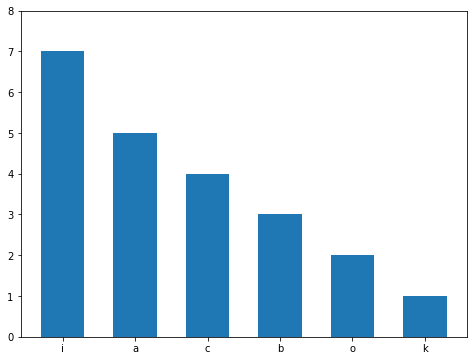

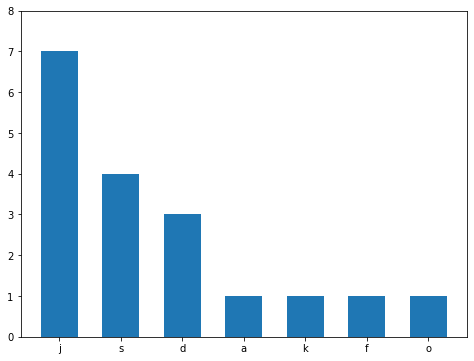

In [24]:
alphabet('aaaaabbbcccciiiiiiiook')
alphabet('a, ; sodsjkjsjjjjdsdjf')

P-2.35

跳过